# **PROYECTO INTEGRADOR CURSO DATA SCIENCE 07-23. DE: SANTIAGO RIVERO**


**INDICE DE COLUMNAS:**


*  Year: Fecha de generación del registro
*  Show_name: Nombre de la obra
*  Potential_Gross: Estimación de ingresos brutos
*  Difference: diferencia de ingresos respecto a la semana anterior (en USD)
*  Average_ticket: precio promedio del valor de la entrada
*   Seats_Sold: butacas vendidas en la semana
*   Seats_in_theater: aforo total del teatro
*   Previews: cantidad de funciones realizadas en la semana
*   %cap: Porcentaje de la capacidad total vendido
*   diff_cap: diferencia porcentual de capacidad respecto a la semana anterior

***FUENTE PRINCIPAL DE LOS DATOS.***: https://www.playbill.com/grosses



#1- Introduccion

## 1.1- ***OBJETIVO DE  LA INVESTIGACIÓN:***
Utilizar el análisis de la evolución de las ventas de entradas de la cartelera teatral de Broadway, Nueva York, mediante datos oficiales de ventas desde 1985 hasta 2022, con el propósito de desarrollar un modelo predictivo que permita anticipar las tendencias futuras de ventas en la industria teatral.

## 1.2- IMPORTACIÓN DE LA BASE DE DATOS

In [72]:
import pandas as pd

df = pd.read_csv("Broadway Shows Data 1985-2022.csv")

#2.- EXPLORACIÓN DE DATOS

In [73]:
#EJECUTAMOS EL COMANDO PARA VER LA ESTRUCTURA DEL DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47720 entries, 0 to 47719
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              47720 non-null  object 
 1   Show_name         47694 non-null  object 
 2   Potential_Gross   47720 non-null  float64
 3   Difference        47720 non-null  float64
 4   Average_ticket    47720 non-null  float64
 5   Seats_Sold        47720 non-null  int64  
 6   Seats_in_theater  47720 non-null  int64  
 7   Previews          47720 non-null  int64  
 8   %cap              47720 non-null  float64
 9   diff_cap          47720 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 3.6+ MB


In [74]:
#EJECUTAMOS COMANDO PARA HACER UN PRIMER PANEO DE LOS DATOS EN FORMATO TABLA (PRIMERAS 100 FILAS)
df.head (50)

,Year,Show_name,Potential_Gross,Difference,Average_ticket,Seats_Sold,Seats_in_theater,Previews,%cap,diff_cap
0,09-06-1985,42nd Street,0.0,0.0,30.42,9281,1655,8,70.10,0.00
1,09-06-1985,A Chorus Line,0.0,0.0,27.25,8167,1472,8,69.35,0.00
2,09-06-1985,Aren't We All?,0.0,0.0,33.75,7386,1088,8,84.86,0.00
3,09-06-1985,Arms and the Man,0.0,0.0,20.87,4586,682,8,84.05,0.00
4,09-06-1985,As Is,0.0,0.0,20.78,2938,684,8,53.69,0.00
5,09-06-1985,Big River,0.0,0.0,31.96,7992,1018,8,98.13,0.00
6,09-06-1985,Biloxi Blues,0.0,0.0,28.33,10831,1336,8,101.34,0.00
7,09-06-1985,Brighton Beach Memoirs,0.0,0.0,18.93,5672,1368,8,51.83,0.00
8,09-06-1985,Cats,0.0,0.0,38.35,12043,1482,8,101.58,0.00
9,09-06-1985,La Cage aux Folles,0.0,0.0,34.30,11921,1683,8,88.54,0.00


In [75]:
#EN LA TABLA ANTERIOR VEMOS QUE LA COLUMNA "POTENTIAL_GROSS" NO TIENE VALORES EN LA MAYORIA DE LOS CASOS POR LO QUE LA BORRAMOS PARA LIMPIAR.
#ADEMAS NO ES UN VALOR RELEVANTE EN ESTE CASO.

df2 = df.drop(columns=['Potential_Gross'] , axis=1)
df2

,Year,Show_name,Difference,Average_ticket,Seats_Sold,Seats_in_theater,Previews,%cap,diff_cap
0,09-06-1985,42nd Street,0.00,30.42,9281,1655,8,70.10,0.00
1,09-06-1985,A Chorus Line,0.00,27.25,8167,1472,8,69.35,0.00
2,09-06-1985,Aren't We All?,0.00,33.75,7386,1088,8,84.86,0.00
3,09-06-1985,Arms and the Man,0.00,20.87,4586,682,8,84.05,0.00
4,09-06-1985,As Is,0.00,20.78,2938,684,8,53.69,0.00
...,...,...,...,...,...,...,...,...,...
47715,08-05-2022,The Phantom of the Opera,117127.78,94.60,7847,1605,8,61.11,9.18
47716,08-05-2022,The Skin of Our Teeth,33370.00,52.81,3304,1058,8,39.04,-8.27
47717,08-05-2022,Tina: The Tina Turner Musical,193232.80,122.56,8694,1478,8,73.53,14.13
47718,08-05-2022,Wicked,144364.00,119.06,11264,1807,8,77.92,4.53


In [76]:
#LA COLUMNA "YEAR" ESTÁ EXPRESADA COMO TIPO DE DATO "OBJECT", VAMOS A FORMATEARLA COMO "FECHA".
df2['Year'] = pd.to_datetime(df2['Year'] , dayfirst=True)

In [77]:
#RENOMBRO LA COLUMNA "YEAR" POR "FECHA" PARA EVITAR CONFUSIONES
df2.rename(columns={'Year':'Fecha'}, inplace=True)

In [78]:
#CHEQUEAMOS EL CAMBIO, Y CONFIRMAMOS QUE AHORA LA COLUMNA SE LLAMA "FECHA" Y QUE ES TIPO "DATETIME"
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47720 entries, 0 to 47719
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecha             47720 non-null  datetime64[ns]
 1   Show_name         47694 non-null  object        
 2   Difference        47720 non-null  float64       
 3   Average_ticket    47720 non-null  float64       
 4   Seats_Sold        47720 non-null  int64         
 5   Seats_in_theater  47720 non-null  int64         
 6   Previews          47720 non-null  int64         
 7   %cap              47720 non-null  float64       
 8   diff_cap          47720 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 3.3+ MB


In [79]:
#EJECTUAMOS CÓDIGO PARA SABER CUÁNTOS VALORES DE CADA SHOW_NAME TENEMOS (YA QUE HAY REGISTROS SEMANALES DE CADA UNO).
#ASÍ PODEMOS VER CUÁLES SON LOS SHOWS QUE MÁS DURARON EN CARTEL Y LOS QUE MÁS IMPACTO TIENEN EN LAS ESTADÍSTICAS GENERALES.

print('Cantidad de Registros por Show (Semanas en cartel):')

df_weeks = df2['Show_name'].value_counts()
df_weeks


Cantidad de Registros por Show (Semanas en cartel):


The Phantom of the Opera                     1704
Chicago                                      1250
The Lion King                                1199
Les Misérables                               1040
Wicked                                        888
                                             ... 
Senator Joe                                     1
Criss Angel Raw — The Mindfreak Unplugged       1
Men Are from Mars Women Are from Venus          1
Kristin Chenoweth: For The Girls                1
Bobbi Boland                                    1
Name: Show_name, Length: 1130, dtype: int64

In [80]:
#AVERIGUAMOS LA CANTIDAD TOTAL DE TICKETS VENDIDOS POR OBRA
print('TOTAL DE TICKETS VENDIDOS - TOP 50:')

df_total_seats = df2.groupby(['Show_name'])['Seats_Sold'].sum()
df_total_seats.sort_values(ascending=False)

TOTAL DE TICKETS VENDIDOS - TOP 50:


Show_name
The Phantom of the Opera                                        19533411
The Lion King                                                   16097255
Wicked                                                          12602093
Les Misérables                                                  10596297
Chicago                                                          9669429
                                                                  ...   
A Mom's Life                                                         444
Raffi                                                                  0
Young Frankenstein                                                     0
The Flying Karamazov Brothers "Juggling and Cheap Theatrics"           0
Basia on Broadway                                                      0
Name: Seats_Sold, Length: 1130, dtype: int64

In [81]:
#LIMPIO ENTRADAS CON VALORES DE "SEATS_SOLD" = 0

df3 = df2.drop(df2[df2['Seats_Sold']==0].index)

In [82]:
#VEMOS LA DIFERENCIA

df_total_seats = df3.groupby(['Show_name'])['Seats_Sold'].sum()
df_total_seats.sort_values(ascending=False)

Show_name
The Phantom of the Opera    19533411
The Lion King               16097255
Wicked                      12602093
Les Misérables              10596297
Chicago                      9669429
                              ...   
Face Value                      2816
Bobbi Boland                    2570
Sid Caesar & Company            2455
Senator Joe                      470
A Mom's Life                     444
Name: Seats_Sold, Length: 1126, dtype: int64

In [83]:
#UNIMOS RESULTADOS ANTERIORES EN UNA SOLA TABLA PARA PODER VISUALIZAR LA RELACIÓN ENTRE LAS SEMANAS EN CARTEL Y
#EL TOTAL DE TICKETS VENDIDOS

df_total_seats = df_total_seats.to_frame(name='TicketsTotales')
df_weeks = df_weeks.to_frame(name='SemanasTotales')
df_totales = df_total_seats.join(df_weeks, how = 'inner')
df_totales.sort_values('TicketsTotales', ascending=False)

,TicketsTotales,SemanasTotales
The Phantom of the Opera,19533411,1704
The Lion King,16097255,1199
Wicked,12602093,888
Les Misérables,10596297,1040
Chicago,9669429,1250
...,...,...
Face Value,2816,1
Bobbi Boland,2570,1
Sid Caesar & Company,2455,2
Senator Joe,470,1


In [84]:
df_totales.describe()

,TicketsTotales,SemanasTotales
count,1.126000e+03,1126.000000
mean,3.346154e+05,42.293073
std,1.144002e+06,106.368230
min,4.440000e+02,1.000000
25%,3.978200e+04,10.000000
50%,8.443800e+04,16.000000
75%,2.079318e+05,37.000000
max,1.953341e+07,1704.000000


In [85]:
#PARA VER LAS OBRAS MÁS EXITOSAS EN TÉRMINOS DE VENTAS POR UNIDAD DE MEDIDA (SEMANAS), DIVIDIMOS LOS TICKETS TOTALES
#POR SEMANAS TOTALES. PODEMOS VER QUE EN LAS OBRAS DE LARGA DURACIÓN, LA QUE MÁS VENDE ES "WICKED" Y NO
#"PHANTOM OF THE OPERA", COMO PODRÍA PARECER EN LA TABLA ANTERIOR

seats_semana = df_totales['Seats_por_semana'] =  df_totales['TicketsTotales']/df_totales['SemanasTotales']
seats_semana = df_totales.sort_values('Seats_por_semana', ascending=False)
seats_semana

,TicketsTotales,SemanasTotales,Seats_por_semana
David Copperfield: Dreams and Nightmares,100217,5,20043.400000
Dr. Seuss' How the Grinch Stole Christmas!,322903,21,15376.333333
Wicked,12602093,888,14191.546171
The Lion King,16097255,1199,13425.567139
Aladdin,4603014,345,13342.069565
...,...,...,...
Prymate,3303,4,825.750000
Corpse!,14493,19,762.789474
Senator Joe,470,1,470.000000
Marc Salem's Mind Games on Broadway,7753,27,287.148148


In [86]:
#VISUALIZAMOS LAS 50 OBRAS MÁS EXITOSAS EN VENTAS POR UNIDAD DE MEDIDA (SEMANAS)
seats_semana.head(50)

,TicketsTotales,SemanasTotales,Seats_por_semana
David Copperfield: Dreams and Nightmares,100217,5,20043.400000
Dr. Seuss' How the Grinch Stole Christmas!,322903,21,15376.333333
Wicked,12602093,888,14191.546171
The Lion King,16097255,1199,13425.567139
Aladdin,4603014,345,13342.069565
Show Boat,1585144,120,13209.533333
Spider-Man Turn Off the Dark,2081663,161,12929.583851
Ragtime,1517285,119,12750.294118
Harry Potter and the Cursed Child,1582019,128,12359.523438
The Illusionists - Witness the Impossible,61251,5,12250.200000


In [87]:
#CHEQUEAMOS NULOS
seats_semana.isnull().sum()

TicketsTotales      0
SemanasTotales      0
Seats_por_semana    0
dtype: int64

In [88]:
#PROMEDIO DE VENTAS TOTAL POR MES, PARA TODAS LAS OBRAS

df_promedio_ventas = df2.groupby(df2.Fecha.dt.month)['Seats_Sold'].sum() / 27
df_promedio_ventas.index=('Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre')
df_promedio_ventas

Enero         1.149215e+06
Febrero       9.526730e+05
Marzo         1.160989e+06
Abril         1.344152e+06
Mayo          1.319312e+06
Junio         1.222493e+06
Julio         1.162143e+06
Agosto        1.097229e+06
Septiembre    9.350753e+05
Octubre       1.135429e+06
Noviembre     1.189217e+06
Diciembre     1.288578e+06
Name: Seats_Sold, dtype: float64

In [89]:
#VENTAS TOTALES POR AÑO

df_ventas_anio = df2.groupby(df2.Fecha.dt.year)['Seats_Sold'].sum()
df_ventas_anio

Fecha
1985     3381654
1986     6395667
1987     7168616
1988     7965237
1989     7456300
1990     6210139
1991     6387768
1992     8009343
1993     6876482
1994     8039662
1995     9655097
1996     9769543
1997    10590094
1998    11654158
1999    11359537
2000    12261299
2001    11394442
2002    10930255
2003    10772805
2004    11355614
2005    11989522
2006    12298099
2007    11980959
2008    12327315
2009    11592522
2010    12119062
2011    12173701
2012    12482330
2013    11597604
2014    12818676
2015    13012345
2016    13272408
2017    13767476
2018    14432837
2019    14713491
2020     2281615
2021     2654997
2022     3676961
Name: Seats_Sold, dtype: int64

In [90]:
df_ventas_anio = df2.groupby(df2.Fecha.dt.year)['Seats_Sold'].sum()
df_ventas_anio

Fecha
1985     3381654
1986     6395667
1987     7168616
1988     7965237
1989     7456300
1990     6210139
1991     6387768
1992     8009343
1993     6876482
1994     8039662
1995     9655097
1996     9769543
1997    10590094
1998    11654158
1999    11359537
2000    12261299
2001    11394442
2002    10930255
2003    10772805
2004    11355614
2005    11989522
2006    12298099
2007    11980959
2008    12327315
2009    11592522
2010    12119062
2011    12173701
2012    12482330
2013    11597604
2014    12818676
2015    13012345
2016    13272408
2017    13767476
2018    14432837
2019    14713491
2020     2281615
2021     2654997
2022     3676961
Name: Seats_Sold, dtype: int64

# **3.- VISUALIZACIÓN**

In [91]:
# Importacion de matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [92]:
df_total_seats20 = df3.groupby(['Show_name'])['Seats_Sold'].sum().nlargest(20)
df_total_seats20 = df_total_seats20.to_frame(name='TicketsTotales20')

## 3.1- VENTAS DE TICKETS POR SHOW

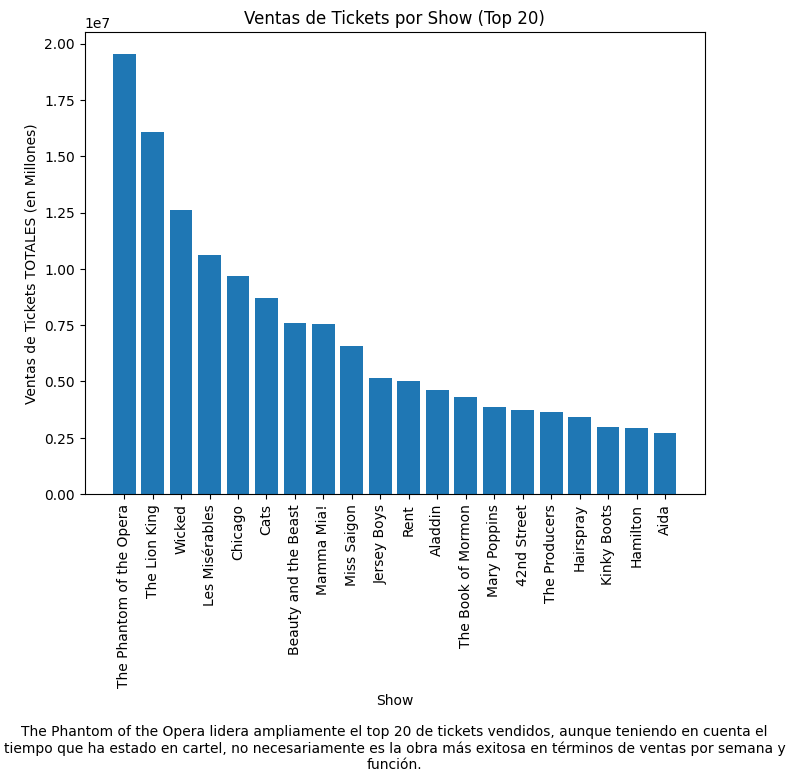

In [93]:
plt.figure(figsize=(8, 6))
plt.bar(df_total_seats20.index, df_total_seats20.TicketsTotales20)
plt.xlabel('Show')
plt.ylabel('Ventas de Tickets TOTALES (en Millones)')
plt.title('Ventas de Tickets por Show (Top 20)')
plt.xticks(rotation=90)

insights_text = "The Phantom of the Opera lidera ampliamente el top 20 de tickets vendidos, aunque teniendo en cuenta el tiempo que ha estado en cartel, no necesariamente es la obra más exitosa en términos de ventas por semana y función."

plt.text(0.5, -0.55, insights_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=10, wrap=True)

plt.show()

#PODEMOS VER LOS SHOWS QUE MÁS ENTRADAS VENDIERON HISTÓRICAMENTE, AUNQUE NO NECESARIAMENTE LOS MÁS EXITOSOS,
#EN FUNCIÓN DEL TIEMPO EN CARTEL.

## 3.2- PORCENTAJE DE OCUPACIÓN DE SALAS

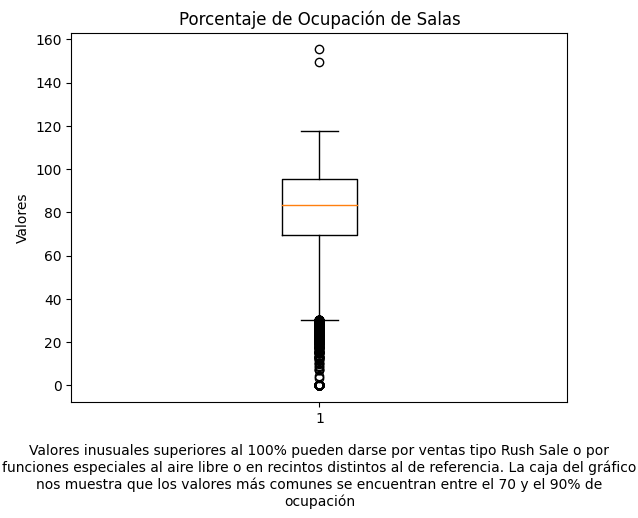

In [94]:
plt.boxplot(df2['%cap'])
plt.xlabel('')
plt.ylabel('Valores')
plt.title('Porcentaje de Ocupación de Salas')

insights_text = "Valores inusuales superiores al 100% pueden darse por ventas tipo Rush Sale o por funciones especiales al aire libre o en recintos distintos al de referencia. La caja del gráfico nos muestra que los valores más comunes se encuentran entre el 70 y el 90% de ocupación"

plt.text(0.5, -0.2, insights_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=10, wrap=True)

plt.show()

#PORCENTAJE GENERAL DE OCUPACIÓN DE LAS SALAS. ES COMÚN EN BROADWAY LA "RUSH SALE" O VENTA DE ÚLTIMO MOMENTO, DONDE
#EN LOS ULTIMOS MINUTOS ANTES DE COMENZAR LA FUNCIÓN SE VENDEN NUEVAMENTE LOS TICKETS DE LA GENTE QUE NO SE PRESENTÓ.
#POR ESO HAY VALORES POR ENCIMA DEL 100%. ADEMÁS PUEDEN ESTAR CONTABILIZADAS FUNCIONES ESPECIALES AL AIRE LIBRE O EN
#OTROS RECINTOS MÁS GRANDES QUE EL USUAL.

## 3.3- PROMEDIO GENERAL DE VENTAS MENSUALES

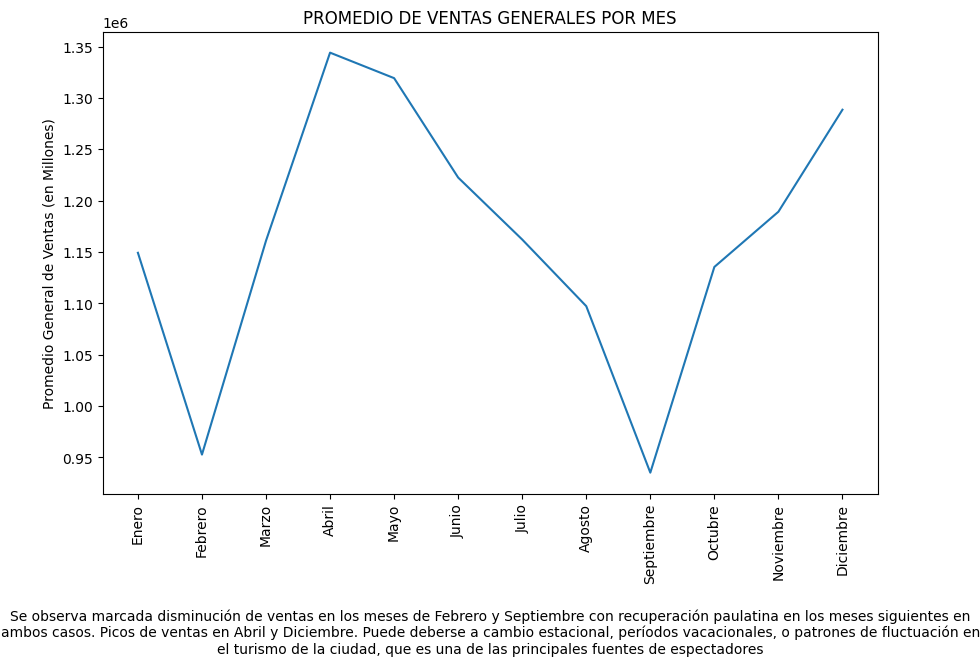

In [95]:
#PROMEDIO GENERAL DE VENTAS POR MES, CONTANDO TODOS LOS AÑOS DE LA DB, TODAS LAS OBRAS.

plt.figure(figsize=(10, 6))
plt.plot(df_promedio_ventas.index,df_promedio_ventas.values)
plt.ylabel('Promedio General de Ventas (en Millones)')
plt.title('PROMEDIO DE VENTAS GENERALES POR MES')
plt.xticks(rotation=90)

insights_text = "Se observa marcada disminución de ventas en los meses de Febrero y Septiembre con recuperación paulatina en los meses siguientes en ambos casos. Picos de ventas en Abril y Diciembre. Puede deberse a cambio estacional, períodos vacacionales, o patrones de fluctuación en el turismo de la ciudad, que es una de las principales fuentes de espectadores"

plt.text(0.5, -0.3, insights_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=10, wrap=True)

plt.show()

## 3.4- VENTAS TOTALES ANUALES

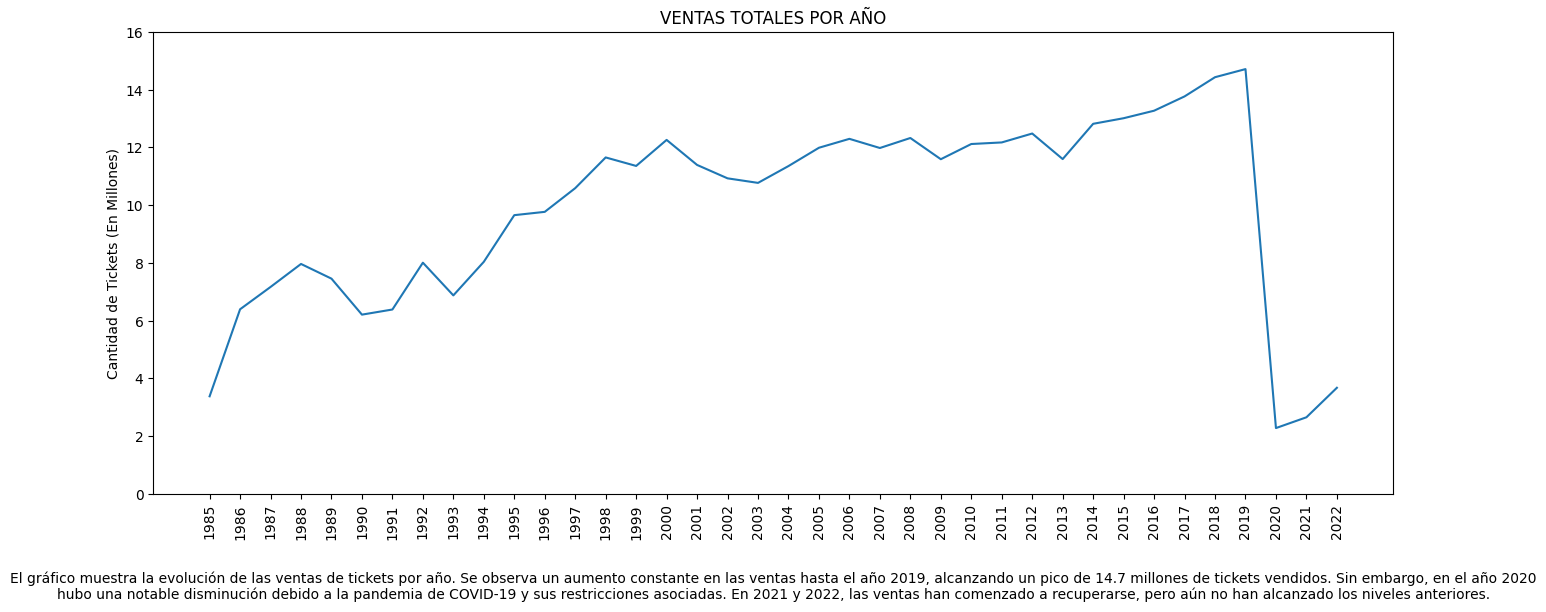

In [96]:
df_ventas_anio_millones = df_ventas_anio / 1000000

plt.figure(figsize=(16, 6))

plt.plot(df_ventas_anio.index, df_ventas_anio_millones.values)
plt.ylabel('Cantidad de Tickets (En Millones)')
plt.title('VENTAS TOTALES POR AÑO')
plt.xticks(rotation=90)
plt.xticks(df_ventas_anio.index)

# Mostrar los números en el eje "Y" en formato de millones
plt.yticks(np.arange(0, df_ventas_anio_millones.max() + 2, 2))

insights_text = "El gráfico muestra la evolución de las ventas de tickets por año. Se observa un aumento constante en las ventas hasta el año 2019, alcanzando un pico de 14.7 millones de tickets vendidos. Sin embargo, en el año 2020 hubo una notable disminución debido a la pandemia de COVID-19 y sus restricciones asociadas. En 2021 y 2022, las ventas han comenzado a recuperarse, pero aún no han alcanzado los niveles anteriores."

plt.text(0.5, -0.2, insights_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=10, wrap=True)

plt.show()

## 3.5- RELACIÓN ENTRE TICKETS VENDIDOS Y SEMANAS EN CARTEL

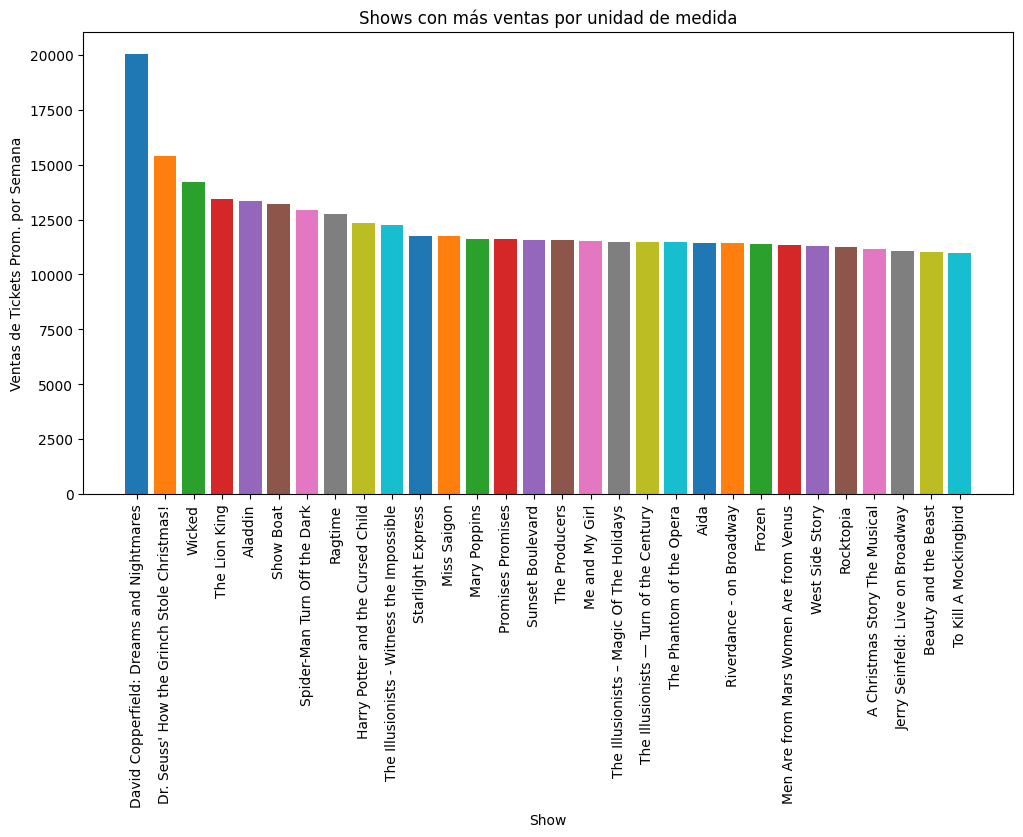

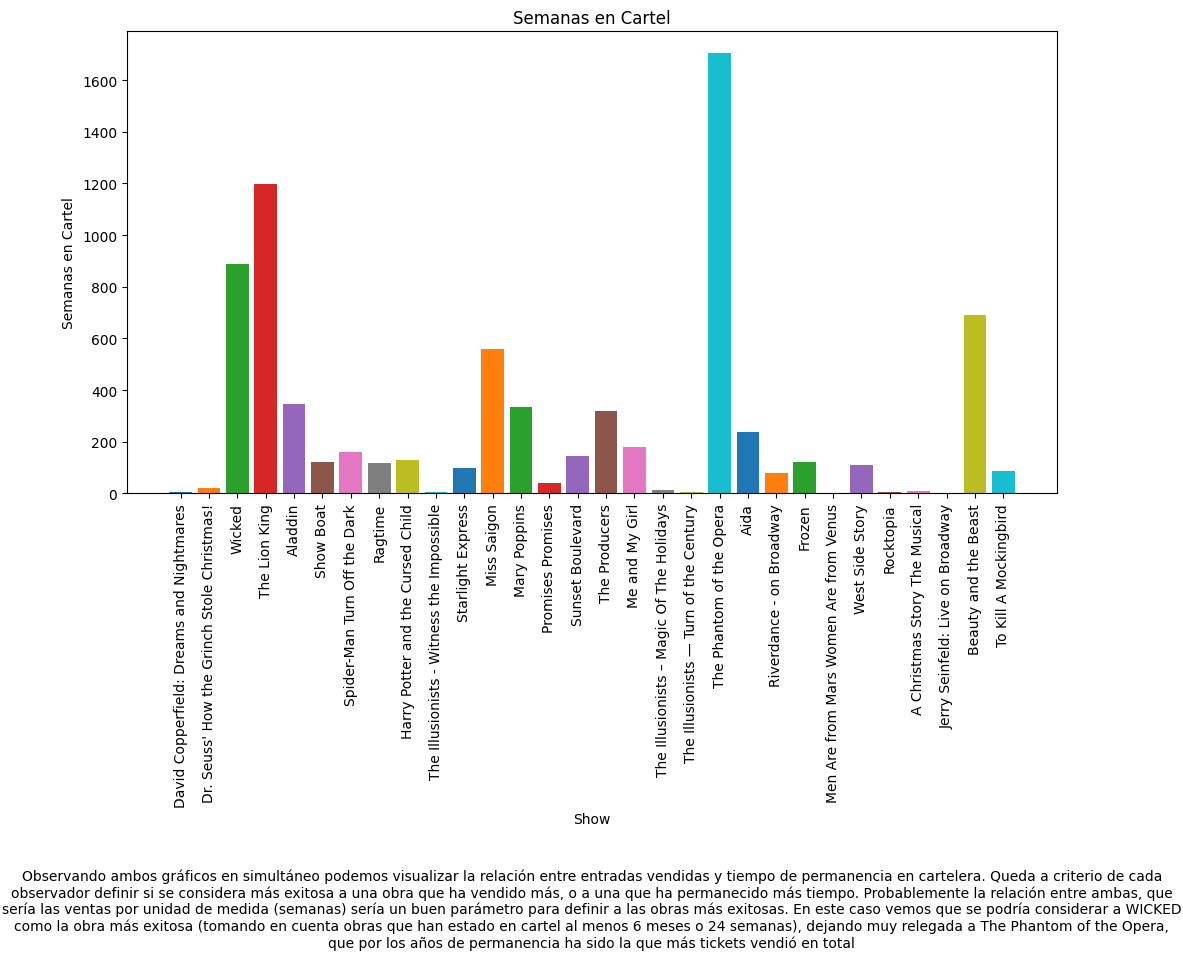

In [97]:
#VISUALIZAMOS EN DOS GRÁFICOS CONSECUTIVOS LA RELACIÓN ENTRE TICKETS VENDIDOS Y SEMANAS EN CARTEL

seats_semana30 = seats_semana.head(30)

import matplotlib.colors as mcolors
num_nombres = len(seats_semana30.index)
colores = list(mcolors.TABLEAU_COLORS.keys())[:num_nombres]

plt.figure(figsize=(12, 6))
plt.bar(seats_semana30.index, seats_semana30.Seats_por_semana, color=colores)
plt.xlabel('Show')
plt.ylabel('Ventas de Tickets Prom. por Semana')
plt.title('Shows con más ventas por unidad de medida')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(seats_semana30.index, seats_semana30.SemanasTotales, color=colores)
plt.xlabel('Show')
plt.ylabel('Semanas en Cartel')
plt.title('Semanas en Cartel')
plt.xticks(rotation=90)

insights_text = "Observando ambos gráficos en simultáneo podemos visualizar la relación entre entradas vendidas y tiempo de permanencia en cartelera. Queda a criterio de cada observador definir si se considera más exitosa a una obra que ha vendido más, o a una que ha permanecido más tiempo. Probablemente la relación entre ambas, que sería las ventas por unidad de medida (semanas) sería un buen parámetro para definir a las obras más exitosas. En este caso vemos que se podría considerar a WICKED como la obra más exitosa (tomando en cuenta obras que han estado en cartel al menos 6 meses o 24 semanas), dejando muy relegada a The Phantom of the Opera, que por los años de permanencia ha sido la que más tickets vendió en total"

plt.text(0.5, -0.9, insights_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=10, wrap=True)


plt.show()

.

# 4- MODELADO

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [99]:
from sklearn.preprocessing import LabelEncoder

# Agregamos un número de Show_ID a cada variable de la columna Show_name, a fines de poder identificarlos numéricamente en el modelado.
label_encoder = LabelEncoder()
df4 = df3['Show_ID'] = label_encoder.fit_transform(df3['Show_name'])
df4 = df3.sort_values('Show_ID', ascending=True)

df4

,Fecha,Show_name,Difference,Average_ticket,Seats_Sold,Seats_in_theater,Previews,%cap,diff_cap,Show_ID
20642,2003-05-11,"""Master Harold""...and the Boys",0.0,39.08,3808,1078,0,44.16,0.00,0
20895,2003-07-13,"""Master Harold""...and the Boys",61572.0,43.47,7108,1078,8,82.42,12.14,0
20872,2003-07-06,"""Master Harold""...and the Boys",-31994.0,40.82,6061,1078,8,70.28,-7.94,0
20848,2003-06-29,"""Master Harold""...and the Boys",7338.0,41.42,6746,1078,8,78.22,0.02,0
20824,2003-06-22,"""Master Harold""...and the Boys",24866.0,40.34,6744,1078,8,78.20,7.97,0
...,...,...,...,...,...,...,...,...,...,...
45763,2019-07-14,NaN,-14198.0,108.00,821,1014,8,80.97,-17.98,1126
45729,2019-07-07,NaN,-37614.0,99.00,854,949,8,89.99,-10.01,1126
45582,2019-06-09,NaN,14656.0,117.00,901,949,8,94.94,14.96,1126
46022,2019-09-15,NaN,3187.0,109.00,973,1014,8,95.96,-0.98,1126


In [100]:
filas_con_nulos = df3['Show_name'].isnull().sum()
filas_con_nulos

26

In [101]:
columna_interes = 'Show_name'
columna_suma = 'Seats_Sold'


filas_con_nulos = df3[df3[columna_interes].isnull()]

total_suma_columna = filas_con_nulos[columna_suma].sum()

total_suma_columna

#HAY 26 ENTRADAS DE DATOS SIN NOMBRE DE SHOW, NO SABEMOS SI ES EL MISMO SHOW O DISTINTOS, PERO EL TOTAL DE VENTAS PARA TODAS ESTAS ENTRADAS ES DE 48767
#UNIDADES, QUE ES UNA CANTIDAD MUY BAJA RESPECTO AL TOTAL, Y QUE NO VA A ALTERAR SENSIBLEMENTE LOS RESULTADOS

48676

In [102]:
#INDEXAMOS LA COLUMNA FECHA
df4.set_index('Fecha', inplace=True)

In [103]:
df4.head()

,Show_name,Difference,Average_ticket,Seats_Sold,Seats_in_theater,Previews,%cap,diff_cap,Show_ID
Fecha,,,,,,,,,
2003-05-11,"""Master Harold""...and the Boys",0.0,39.08,3808,1078,0,44.16,0.00,0
2003-07-13,"""Master Harold""...and the Boys",61572.0,43.47,7108,1078,8,82.42,12.14,0
2003-07-06,"""Master Harold""...and the Boys",-31994.0,40.82,6061,1078,8,70.28,-7.94,0
2003-06-29,"""Master Harold""...and the Boys",7338.0,41.42,6746,1078,8,78.22,0.02,0
2003-06-22,"""Master Harold""...and the Boys",24866.0,40.34,6744,1078,8,78.20,7.97,0


In [104]:
#AGRUPAMOS LAS VENTAS POR CADA DÍA DE REGISTRO GENERAL (1 POR SEMANA)

df_ventas_dia = df4.groupby(df4.index)['Seats_Sold'].sum()
df_ventas_dia = df_ventas_dia.to_frame(name= 'ventas_dia')

df_ventas_dia

,ventas_dia
Fecha,
1985-06-09,123704
1985-06-16,124930
1985-06-23,121406
1985-06-30,122364
1985-07-07,100169
...,...
2022-04-10,228395
2022-04-17,264020
2022-04-24,267796


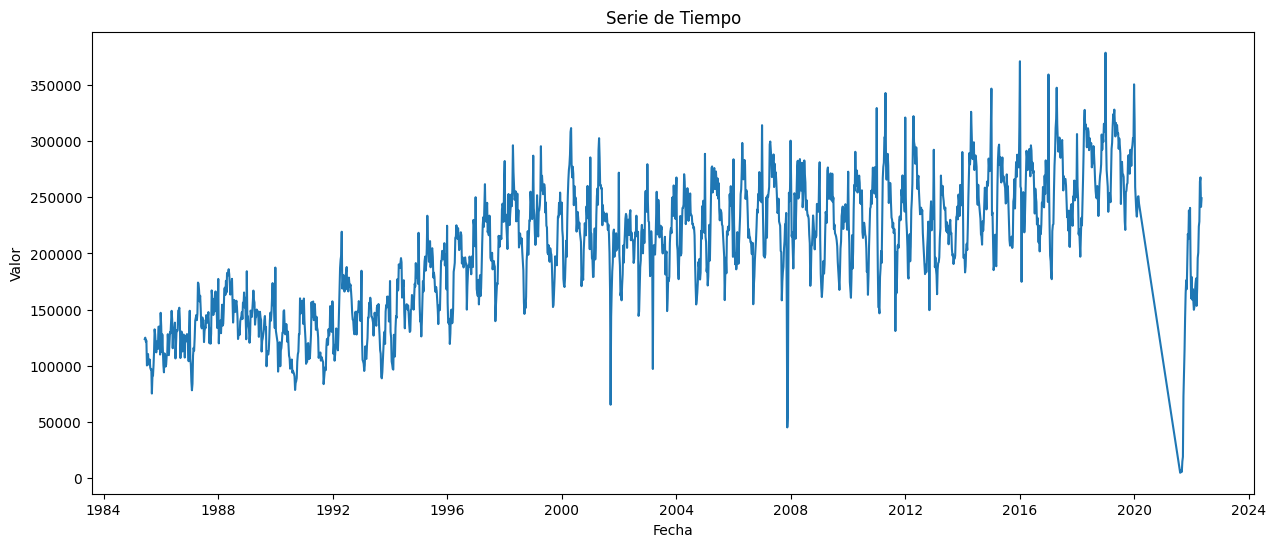

In [107]:
#VISUALIZACIÓN DE LA SERIE DE TIEMPO

plt.figure(figsize=(15, 6))
plt.plot(df_ventas_dia)
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie de Tiempo')
plt.show()

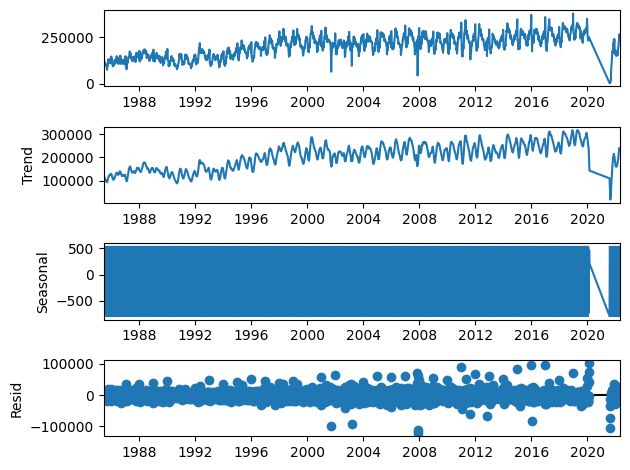

In [108]:
#DESCOMPOSICIÓN DE LA SERIE DE TIEMPO

decomposition = sm.tsa.seasonal_decompose(df_ventas_dia, model='additive', period= 7)
fig = decomposition.plot()
plt.show()

In [109]:
#PRUEBAS DE ESTACIONARIEDAD

from statsmodels.tsa.stattools import adfuller

# Función para realizar la prueba de Dickey-Fuller aumentada

def test_stationarity(timeseries):

    # Realizar la prueba de Dickey-Fuller:

    result = adfuller(timeseries, autolag='AIC')
    print('Resultados de la prueba de Dickey-Fuller:')
    print('Valor p:', result[1])
    print('Estacionaria:' ,result[1] <= 0.05)

# Aplicar la prueba de estacionariedad a la serie de tiempo

test_stationarity(df_ventas_dia['ventas_dia'])

Resultados de la prueba de Dickey-Fuller:
Valor p: 0.053778588101665824
Estacionaria: False


In [110]:
# Aplicar diferenciación para hacer que la serie de tiempo sea estacionaria
data_diff = df_ventas_dia.diff().dropna()

# Realizar la prueba de estacionariedad en la serie diferenciada
test_stationarity(data_diff['ventas_dia'])

Resultados de la prueba de Dickey-Fuller:
Valor p: 2.3948885415947675e-26
Estacionaria: True


In [ ]:
data = df_ventas_dia.dropna()
data

## 4.1- INTENTAMOS PREDICCIONES UTILIZANDO MÉTODO ARIMA

In [113]:
model = sm.tsa.ARIMA(data['ventas_dia'], order=(0, 0, 0))
results = model.fit()

results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             ventas_dia   No. Observations:                 1850
Model:                          ARIMA   Log Likelihood              -28924.749
Date:                Tue, 25 Jul 2023   AIC                          57853.497
Time:                        22:51:58   BIC                          57864.543
Sample:                             0   HQIC                         57857.569
                               - 1850                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.037e+05   2.46e+06      0.083      0.934   -4.62e+06    5.03e+06
sigma2      6.053e+12   2.82e+11     21.494      0.000     5.5e+12     6.6e+12
===================================================================================
Ljung-Box (L1) (Q):                1605.83   Jarque-Bera (JB):                24.55
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.19
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


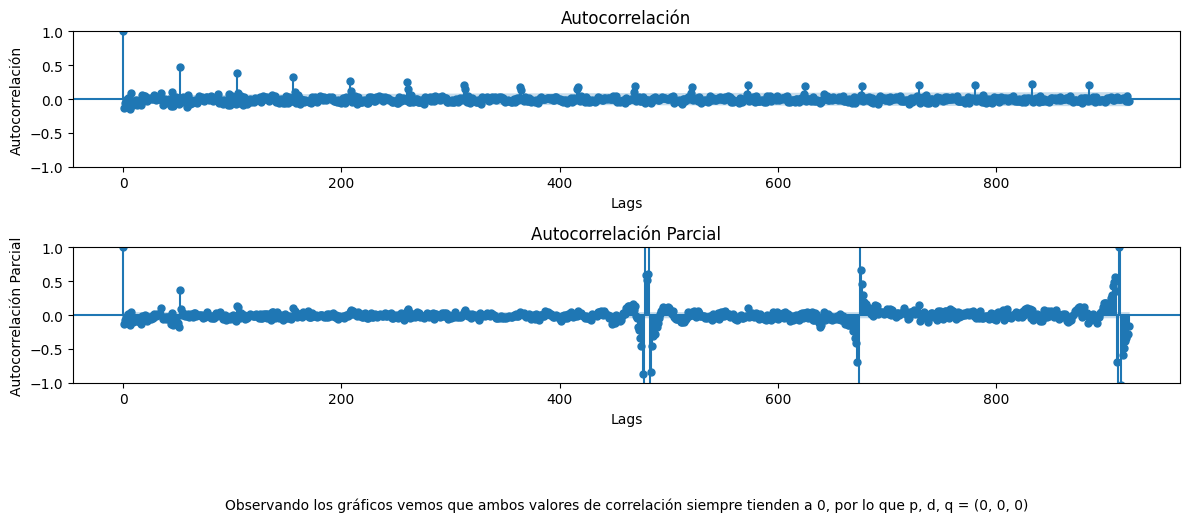

In [114]:
#Gráficos de autocorrelación (ACF) y autocorrelación parcial (PACF) para identificar los términos p y q respectivamente. El valor d es 0 ya que la serie es estacionaria.

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = data_diff

plt.figure(figsize=(12, 6))

# Gráfico ACF
plt.subplot(2, 1, 1)
plot_acf(data['ventas_dia'], lags=922, ax=plt.gca())
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.title('Autocorrelación')

# Gráfico PACF
plt.subplot(2, 1, 2)
plot_pacf(data['ventas_dia'], lags=922, ax=plt.gca())
plt.xlabel('Lags')
plt.ylabel('Autocorrelación Parcial')
plt.title('Autocorrelación Parcial')

insights_text = "Observando los gráficos vemos que ambos valores de correlación siempre tienden a 0, por lo que p, d, q = (0, 0, 0)"

plt.text(0.5, -0.9, insights_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=10, wrap=True)


plt.tight_layout()
plt.show()

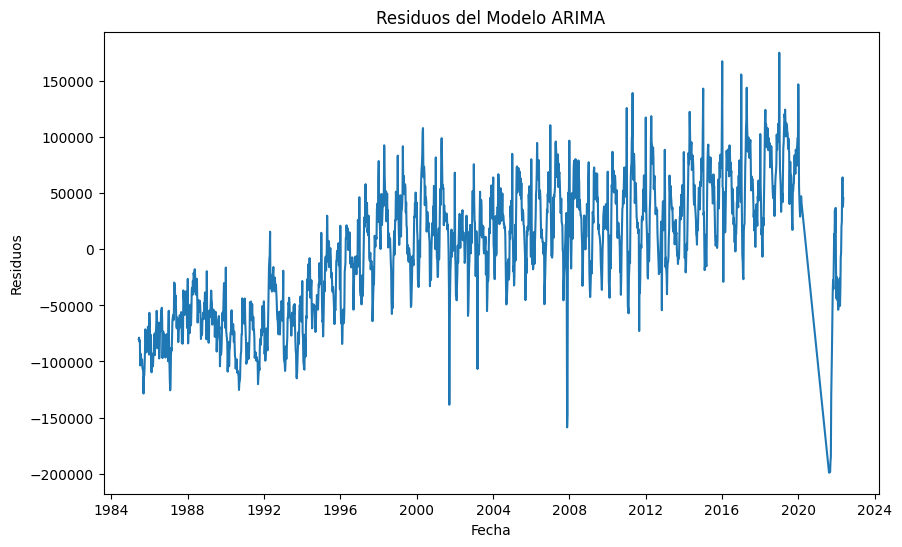

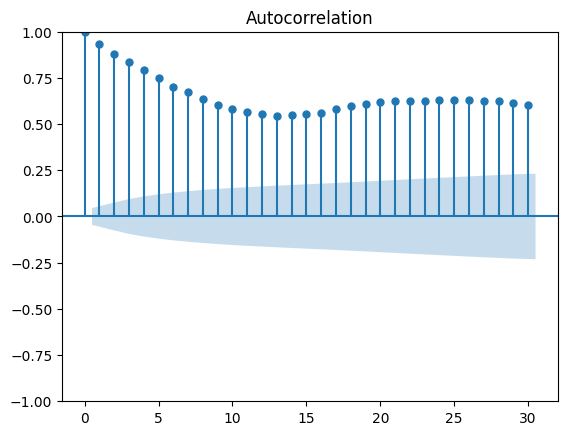

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


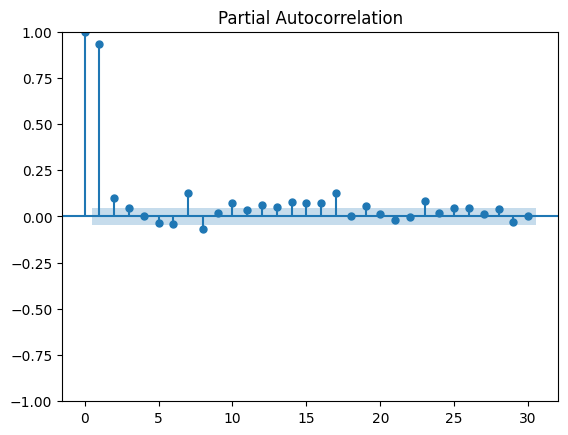

In [115]:
# Visualización de los residuos del modelo ARIMA
plt.figure(figsize=(10, 6))
plt.plot(results.resid)
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.title('Residuos del Modelo ARIMA')
plt.show()

# Prueba de autocorrelación de los residuos
sm.graphics.tsa.plot_acf(results.resid, lags=30)
plt.show()

# Prueba de autocorrelación parcial de los residuos
sm.graphics.tsa.plot_pacf(results.resid, lags=30)
plt.show()

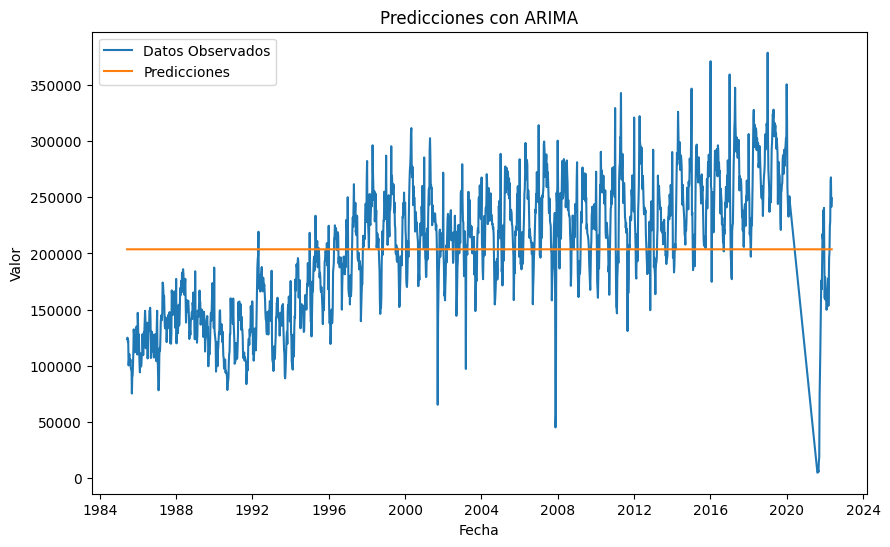

In [177]:
# Realizar predicciones con el modelo ARIMA
start_date = '1985-06-09'  # Reemplazar con la fecha de inicio de las predicciones
end_date = '2022-05-08'    # Reemplazar con la fecha de finalización de las predicciones
forecast = results.predict(start=start_date, end=end_date)

# Graficar las predicciones
plt.figure(figsize=(10, 6))
plt.plot(data['ventas_dia'], label='Datos Observados')  # Reemplaza 'columna_con_valores' con el nombre de tu columna de valores
plt.plot(forecast, label='Predicciones')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Predicciones con ARIMA')
plt.legend()
plt.show()

NO OBTUVIMOS LOS MEJORES RESULTADOS UTILIZANDO ESTE MÉTODO. PROBAREMOS EL MÉTODO DE REGRESIÓN LINEAL.

## 4.2- UTILIZANDO MÉTODO DE REGRESIÓN LINEAL

In [178]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lags = 3  # Número de lags a incluir como características
for i in range(1, lags + 1):
    data[f'Lag_{i}'] = data['ventas_dia'].shift(i)

# Eliminar filas con valores faltantes (NaN) debido a los lags
data.dropna(inplace=True)

# Dividir el DataFrame en conjunto de entrenamiento y conjunto de prueba
train_size = int(0.8 * len(data))
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# Entrenar el modelo de regresión lineal
X_train = train_data.drop('ventas_dia', axis=1)
y_train = train_data['ventas_dia']
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
X_test = test_data.drop('ventas_dia', axis=1)
y_test = test_data['ventas_dia']
predictions = model.predict(X_test)

# Calcular el error cuadrático medio (MSE) en el conjunto de prueba
mse = mean_squared_error(y_test, predictions)
print(f"Error cuadrático medio (MSE): {mse}")

Error cuadrático medio (MSE): 649590525.1325794


In [ ]:
data = df_ventas_dia.dropna()
data

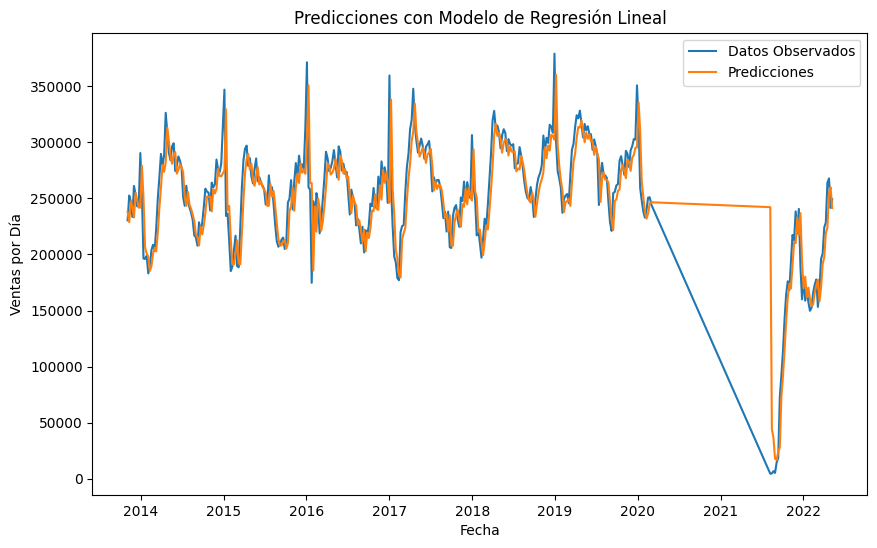

In [183]:
# Graficar las predicciones y los datos observados en el conjunto de prueba
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Datos Observados')
plt.plot(y_test.index, predictions, label='Predicciones')
plt.xlabel('Fecha')
plt.ylabel('Ventas por Día')
plt.title('Predicciones con Modelo de Regresión Lineal')
plt.legend()
plt.show()

In [150]:
#DIVIDIR LOS DATOS EN CONJUNTO DE ENTRENAMIENTO Y PRUEBA

from sklearn.model_selection import train_test_split

X = data.drop('ventas_dia', axis=1)
y = data['ventas_dia']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4.3- PREDICCIONES FINALES CON REGRESIÓN LINEAL


Año 2023:
   Predicción de ventas totales: 11.91 Millones
   Tendencia: aumento
Año 2024:
   Predicción de ventas totales: 12.01 Millones
   Tendencia: aumento
Año 2025:
   Predicción de ventas totales: 12.11 Millones
   Tendencia: aumento
Año 2026:
   Predicción de ventas totales: 12.21 Millones
   Tendencia: aumento
Año 2027:
   Predicción de ventas totales: 12.31 Millones
   Tendencia: aumento
Año 2028:
   Predicción de ventas totales: 12.42 Millones
   Tendencia: aumento


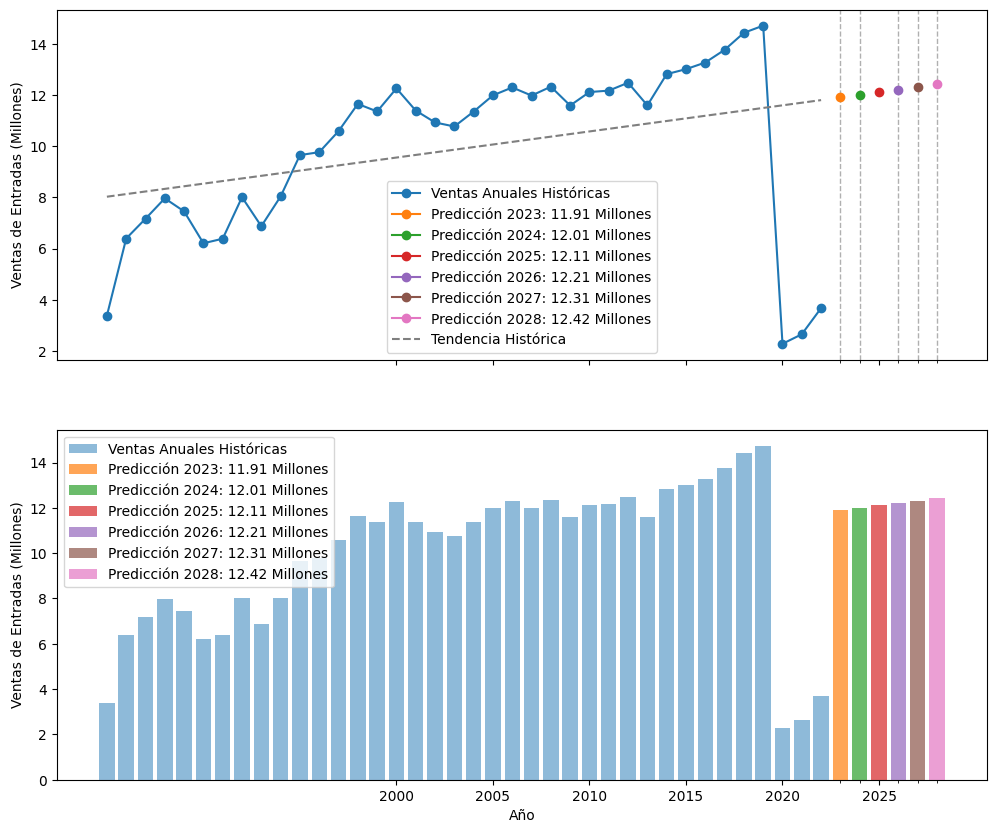

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as mticker

df['Year'] = pd.to_datetime(df['Year'], format='%d-%m-%Y')

# Agrupamos los datos por año y calcular el total de ventas de entradas por año
ventas_anuales = df.resample('Y', on='Year')['Seats_Sold'].sum()

# Convertimos el índice de ventas_anuales en valores numéricos para la regresión
X = ventas_anuales.index.year.values.reshape(-1, 1)

# Valores de ventas totales como variable objetivo para la regresión
y = ventas_anuales.values

# Creamos y entrenamos el modelo de regresión lineal
modelo_regresion = LinearRegression()
modelo_regresion.fit(X, y)

# Realizamos predicciones para los próximos años (2023, 2024, 2025, 2026, 2027, 2028)
proximos_anios = np.array([2023, 2024, 2025, 2026, 2027, 2028]).reshape(-1, 1)
prediccion = modelo_regresion.predict(proximos_anios)

# Calculamos la tendencia a partir del modelo de regresión lineal
tendencia = modelo_regresion.predict(X)
tendencia_proximos_anios = modelo_regresion.predict(proximos_anios)

# Convertimos las ventas a millones para mejor visualización gráfica
y_millones = y / 1_000_000
prediccion_millones = prediccion / 1_000_000
tendencia_millones = tendencia / 1_000_000
tendencia_proximos_anios_millones = tendencia_proximos_anios / 1_000_000

# Visualizamos las predicciones y tendencias en pantalla para los años 2023, 2024, 2025, 2026, 2027 y 2028
for i, anio in enumerate(proximos_anios):
    prediccion_actual = prediccion_millones[i]
    tendencia_actual = 'aumento' if tendencia_millones[-1] < prediccion_actual else 'disminución'
    print(f"Año {anio[0]}:")
    print(f"   Predicción de ventas totales: {prediccion_actual:.2f} Millones")
    print(f"   Tendencia: {tendencia_actual}")


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Gráfico de líneas para las predicciones y valores históricos
ax1.plot(ventas_anuales.index.year, y_millones, label='Ventas Anuales Históricas', marker='o')
for i, anio in enumerate(proximos_anios):
    prediccion_actual = prediccion_millones[i]
    ax1.plot(anio, prediccion_actual, marker='o', label=f'Predicción {anio[0]}: {prediccion_actual:.2f} Millones')

# Gráfico de barras para los años 2000 hasta el 2028
ax2.bar(ventas_anuales.index.year, y_millones, alpha=0.5, label='Ventas Anuales Históricas')
for i, anio in enumerate(proximos_anios):
    prediccion_actual = prediccion_millones[i]
    ax2.bar(anio, prediccion_actual, alpha=0.7, label=f'Predicción {anio[0]}: {prediccion_actual:.2f} Millones')

# Resto del código para graficar las tendencias para los años anteriores
ax1.plot(ventas_anuales.index.year, tendencia_millones, label='Tendencia Histórica', linestyle='dashed')
ax1.legend()
ax1.set_ylabel('Ventas de Entradas (Millones)')

# Etiquetas en el eje x cada 5 años
ax1.set_xticks(np.arange(2000, 2029, 1)[::5])

# Etiquetas para los años en el eje x
ax1.set_xticks(proximos_anios[:, 0], minor=True)
ax1.xaxis.grid(which='minor', linestyle='--', linewidth=1)

ax2.legend()
ax2.set_xlabel('Año')
ax2.set_ylabel('Ventas de Entradas (Millones)')

plt.show()


# 5.- CONCLUSIONES

Luego de analizar las ventas anuales de entradas de Broadway a lo largo del tiempo con los datos proporcionados y realizar predicciones para los años venideros, podemos destacar algunas conclusiones:

1. Tendencia general: A lo largo de los años, las ventas anuales de entradas de Broadway han mostrado una tendencia general al alza. Esta tendencia se ha mantenido constante durante gran parte del período histórico.

2. Vemos una rotunda caída en el año 2020, producto de la pandemia de COVID-19 y sus restricciones asociadas. La recuperación en los años posteriores es positiva, pero al menos hasta el año 2022, no alcanzó a recuperar, ni siquiera a acercarse a los valores de ventas anteriores a este evento.

3. Predicciones para los próximos años: Según el modelo de regresión lineal, las predicciones para los años 2023, 2024, 2025, 2026, 2027 y 2028 sugieren que las ventas anuales de entradas de Broadway continuarán creciendo. Sin embargo, es importante tener en cuenta que las predicciones son estimaciones basadas en datos históricos y pueden estar sujetas a incertidumbre, y a eventos fortuitos e imponderables como ya hemos visto que sucedió anteriormente.

4. Crecimiento sostenido: Las predicciones indican que el crecimiento en las ventas anuales de entradas se mantendrá en los próximos años. Esto puede ser una señal positiva para la industria de Broadway y sugiere que la demanda de espectáculos teatrales sigue siendo fuerte.

